# Complete the Machine Learning Prediction

## Import Libraries and Define Auxiliary Functions

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe

In [3]:
import requests
import pandas as pd
import io

# Define the URL
URL =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the dataset
response = requests.get(URL)
text1 = io.BytesIO(response.content)
data = pd.read_csv(text1)
data.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response = requests.get(URL2)
text2 = io.BytesIO(response.content)
X = pd.read_csv(text2)
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### TASK 1

Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).

In [7]:
import numpy as np

# Convert the 'Class' column to a NumPy array
Y = data['Class'].to_numpy()

# Check the output
print(Y)
print(type(Y))  # This will confirm it's a NumPy array


[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
<class 'numpy.ndarray'>


### TASK 2

We split the data into training and testing data using the function train_test_split. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function GridSearchCV.

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Step 1: Standardize the data
transform = StandardScaler()
X = transform.fit_transform(X)  # Apply the transformation and reassign to X

# Step 2: Split the data into training and testing sets
# Assuming `Y` is already defined from Task 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 3: Further split training data into training and validation sets
X_train_main, X_val, Y_train_main, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

# Step 4: Define a model and hyperparameter grid
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Step 5: Use GridSearchCV for hyperparameter selection
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_main, Y_train_main)

# Step 6: Get the best parameters and train the final model
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Optional: Evaluate the best model on the validation data
val_accuracy = best_model.score(X_val, Y_val)
print("Validation Accuracy:", val_accuracy)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, min_s

## TASK 3

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels

In [9]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Verifying the shape of Y_test
print("Shape of Y_test:", Y_test.shape)


Shape of Y_test: (18,)


## TASK 4


Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameter

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Step 1: Define the Logistic Regression model
lr = LogisticRegression()

# Step 2: Define the parameter grid
parameters = {
    "C": [0.01, 0.1, 1],
    "penalty": ["l2"],  # l2 regularization (ridge regression)
    "solver": ["lbfgs"]  # Optimization algorithm
}

# Step 3: Create the GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10, scoring="accuracy", verbose=1)

# Step 4: Fit the GridSearchCV object to the training data
logreg_cv.fit(X_train, Y_train)

# Step 5: Output the best parameters and the best score
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy on validation data:", logreg_cv.best_score_)


Fitting 10 folds for each of 3 candidates, totalling 30 fits
Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on validation data: 0.8464285714285713


## TASK 5

Calculate the accuracy on the test data using the method score:

Accuracy on test data: 0.8333333333333334


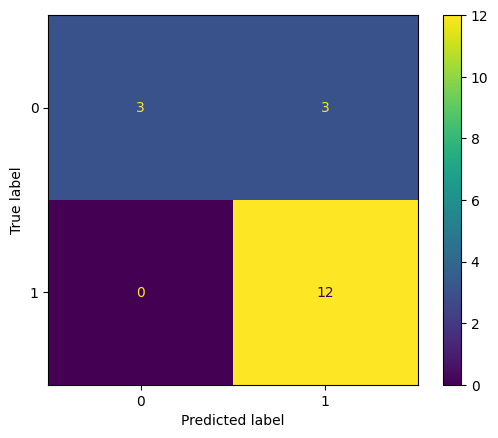

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Calculate accuracy on the test data
accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)

# Step 2: Generate predictions for the test data
yhat = logreg_cv.predict(X_test)

# Step 3: Create and display the confusion matrix
cm = confusion_matrix(Y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_cv.classes_)
disp.plot(cmap="viridis")

# Display the plot
import matplotlib.pyplot as plt
plt.show()


## TASK 6

Create a support vector machine object then create a GridSearchCV object svm_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Step 1: Define the SVM model
svm = SVC()

# Step 2: Define the parameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),  # Values for regularization parameter
    'gamma': np.logspace(-3, 3, 5)  # Kernel coefficient
}

# Step 3: Create the GridSearchCV object
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, scoring="accuracy", verbose=1)

# Step 4: Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, Y_train)

# Step 5: Output the best parameters and the best score
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy on validation data:", svm_cv.best_score_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Tuned hyperparameters (best parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy on validation data: 0.8482142857142856


## TASK 7

Calculate the accuracy on the test data using the method score:

Accuracy on test data: 0.8333333333333334


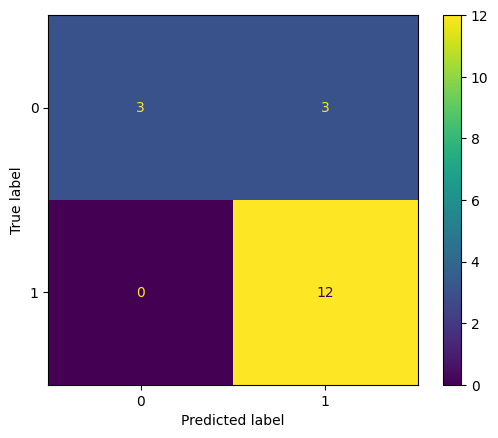

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Calculate accuracy on the test data
accuracy = svm_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)

# Step 2: Generate predictions for the test data
yhat = svm_cv.predict(X_test)

# Step 3: Create and display the confusion matrix
cm = confusion_matrix(Y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_cv.classes_)
disp.plot(cmap="viridis")

# Display the plot
import matplotlib.pyplot as plt
plt.show()



## TASK 8

Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define the Decision Tree Classifier model
tree = DecisionTreeClassifier()

# Step 2: Define the parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],  # Depth ranges from 2 to 18
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Step 3: Create the GridSearchCV object
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10, scoring="accuracy", verbose=1)

# Step 4: Fit the GridSearchCV object to the training data
tree_cv.fit(X_train, Y_train)

# Step 5: Output the best parameters and the best score
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy on validation data:", tree_cv.best_score_)


Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy on validation data: 0.8892857142857145


C:\Users\solomon.mehari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\solomon.mehari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\solomon.mehari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\solomon.mehari\AppData\Local\Programs\Python\P

## TASK 9

Calculate the accuracy of tree_cv on the test data using the method score:

In [22]:
# Calculate accuracy on test data
test_accuracy = tree_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.6666666666666666


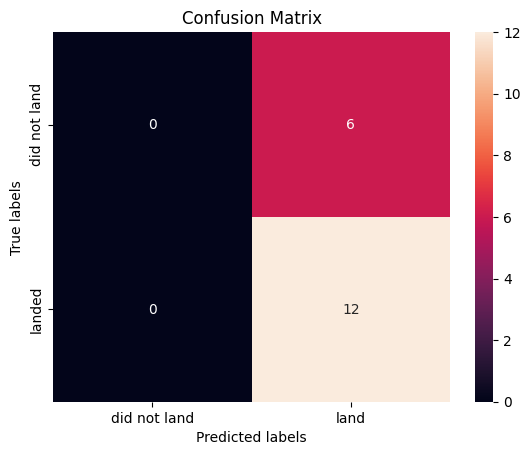

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

# Predict test data
yhat = tree_cv.predict(X_test)

# Plot confusion matrix
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)


## TASK 10

Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [28]:
# Import required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

# Define parameter grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean distance
}

# Create KNN object
KNN = KNeighborsClassifier()

# Create GridSearchCV object
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Fit the model to the training data
knn_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy on validation data
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy on validation data:", knn_cv.best_score_)

# Calculate the accuracy on the test data
test_accuracy = knn_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

# Predict test data
yhat = knn_cv.predict(X_test)





Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy on validation data: 0.8482142857142858
Test Accuracy: 0.8333333333333334


## TASK 11

Calculate the accuracy of knn_cv on the test data using the method score:

Test Accuracy: 0.8333333333333334


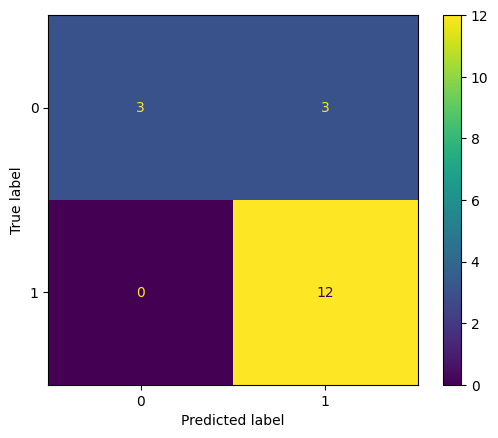

In [29]:
# Import required libraries
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate accuracy on the test data
test_accuracy = knn_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

# Predict test data
yhat = knn_cv.predict(X_test)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, yhat)


## TASK 12

Find the method performs best:

In [30]:
# Dictionary to store test accuracies
model_accuracies = {
    "Logistic Regression": logreg_cv.score(X_test, Y_test),
    "Support Vector Machine": svm_cv.score(X_test, Y_test),
    "Decision Tree": tree_cv.score(X_test, Y_test),
    "K-Nearest Neighbors": knn_cv.score(X_test, Y_test)
}

# Find the best-performing model
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

# Display the results
print("Model Test Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

print("\nBest Performing Model:")
print(f"{best_model} with an accuracy of {best_accuracy:.4f}")


Model Test Accuracies:
Logistic Regression: 0.8333
Support Vector Machine: 0.8333
Decision Tree: 0.6667
K-Nearest Neighbors: 0.8333

Best Performing Model:
Logistic Regression with an accuracy of 0.8333
